In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
import seaborn as sns


In [93]:
data = np.load("olivetti_faces.npy")
y = np.load("olivetti_faces_target.npy")


In [94]:
def show_40_distinct_people(images, unique_ids):
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr=axarr.flatten()
    
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    

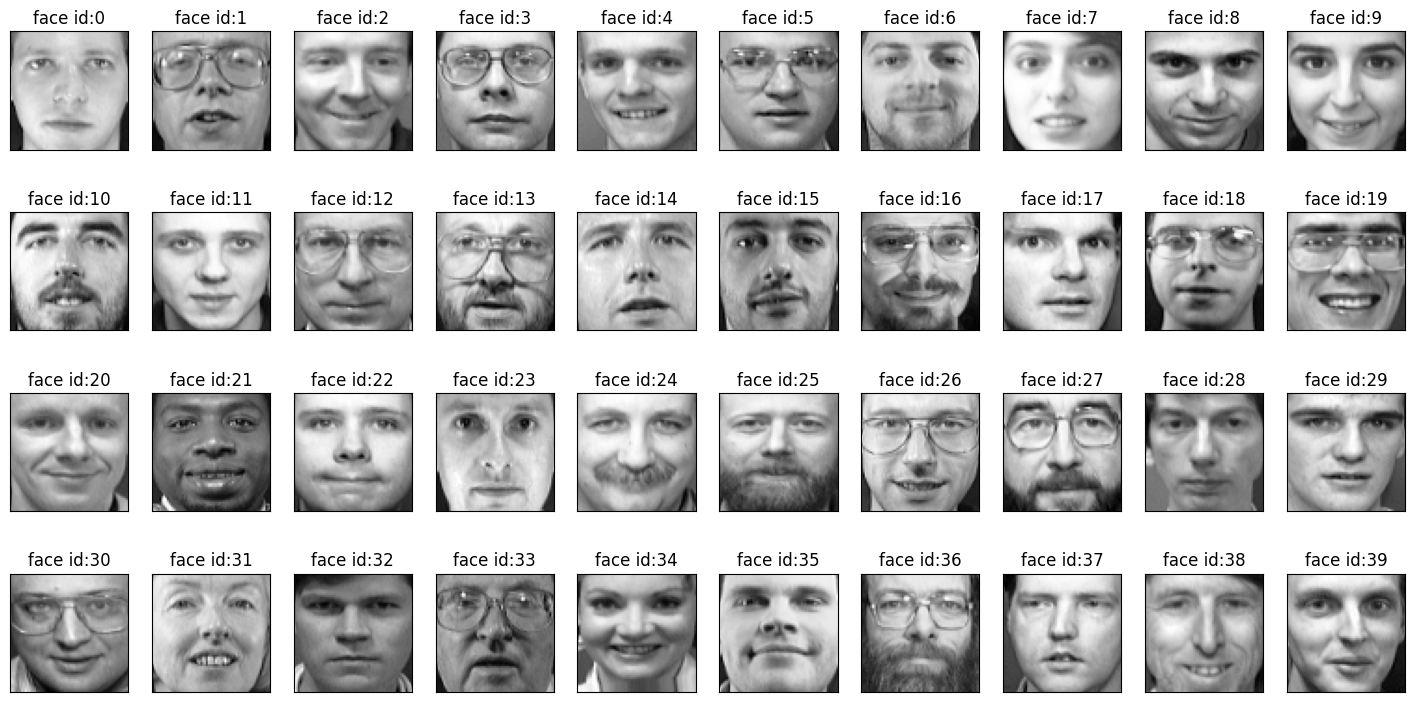

In [95]:
show_40_distinct_people(data, np.unique(y))

In [96]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

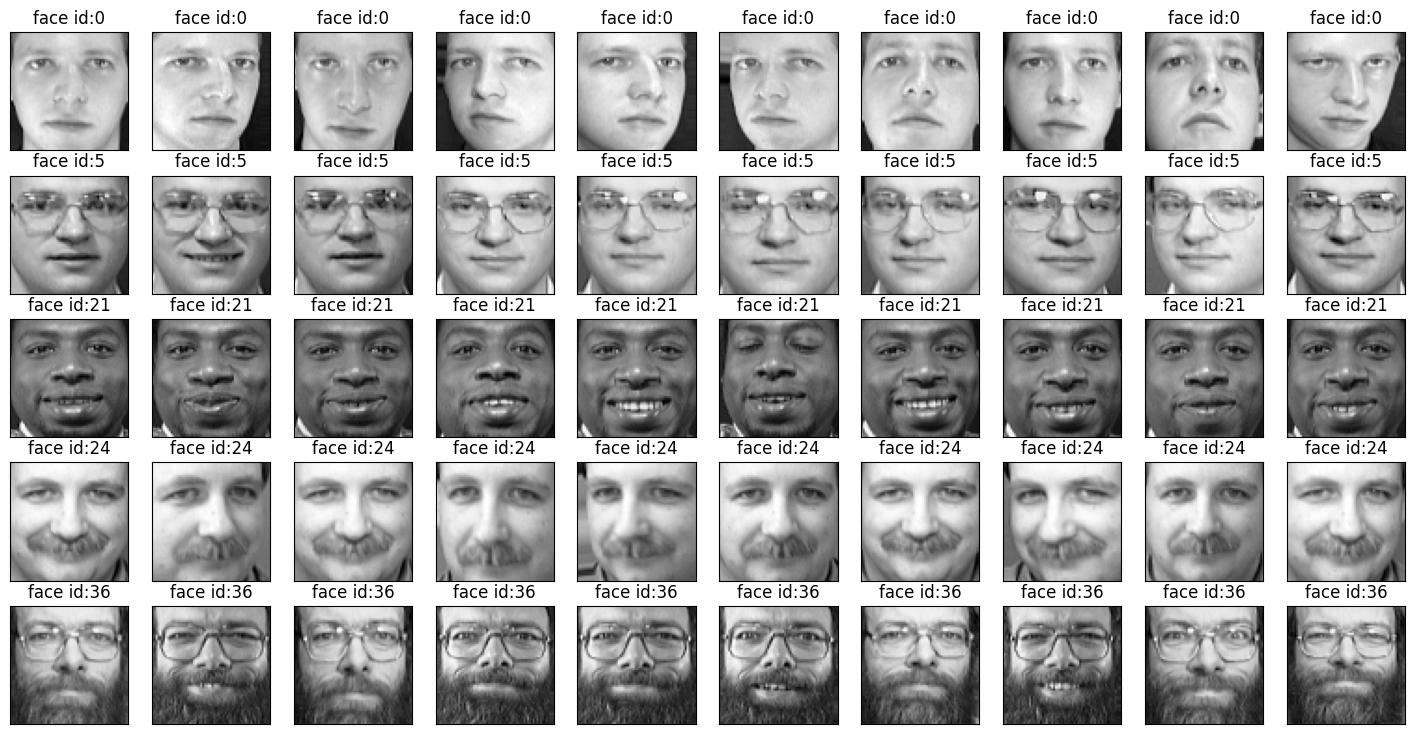

In [97]:
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

In [98]:
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
X.shape

(400, 4096)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [100]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']}


In [101]:
stratified_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

svm_classifier = SVC()

grid_search = GridSearchCV(svm_classifier, param_grid, cv=stratified_kfold, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['linear']},
             scoring='accuracy', verbose=1)

In [102]:
print("Best Parameters: ", grid_search.best_params_)

best_svm_classifier = grid_search.best_estimator_

Best Parameters:  {'C': 0.1, 'kernel': 'linear'}


In [103]:
y_predTrain = best_svm_classifier.predict(X_train)
accuracyTrain = accuracy_score(y_train, y_predTrain)
print("AccuracyTrain:", accuracyTrain)

AccuracyTrain: 1.0


In [104]:
y_predTest = best_svm_classifier.predict(X_test)
accuracyTest = accuracy_score(y_test, y_predTest)
print("AccuracyTest:", accuracyTest)

AccuracyTest: 0.975


<module 'matplotlib.pyplot' from '/home/casal/anaconda3/envs/firstEnv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

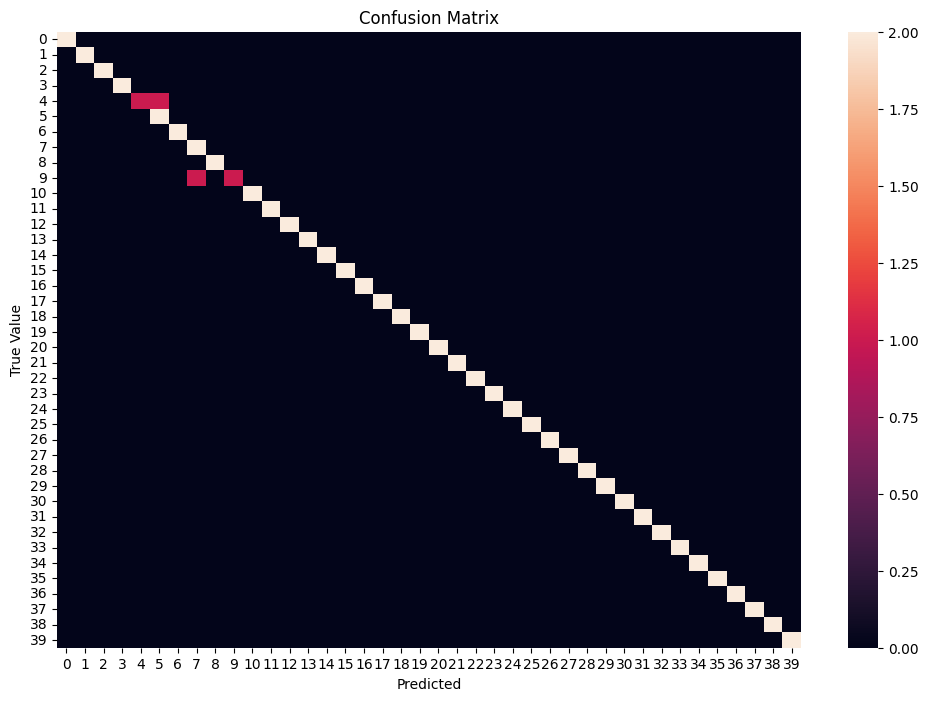

In [105]:
cm = confusion_matrix(y_test, y_predTest)
plt.figure(1, figsize=(12, 8))
sns.heatmap(cm, fmt='g') 

plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')

plt

In [106]:
resultsSVM = {
    'Model': [],
    'Dataset': [],
    'Accuracy': []
}

resultsSVM['Model'].append('SVM')
resultsSVM['Dataset'].append('Training Set')
resultsSVM['Accuracy'].append(accuracyTrain*100)

resultsSVM['Model'].append('SVM')
resultsSVM['Dataset'].append('Test Set')
resultsSVM['Accuracy'].append(accuracyTest*100)



df = pd.DataFrame(resultsSVM)
df['Accuracy'] = df['Accuracy'].map('{:.2f}%'.format)
display(df)

,Model,Dataset,Accuracy
0,SVM,Training Set,100.00%
1,SVM,Test Set,97.50%


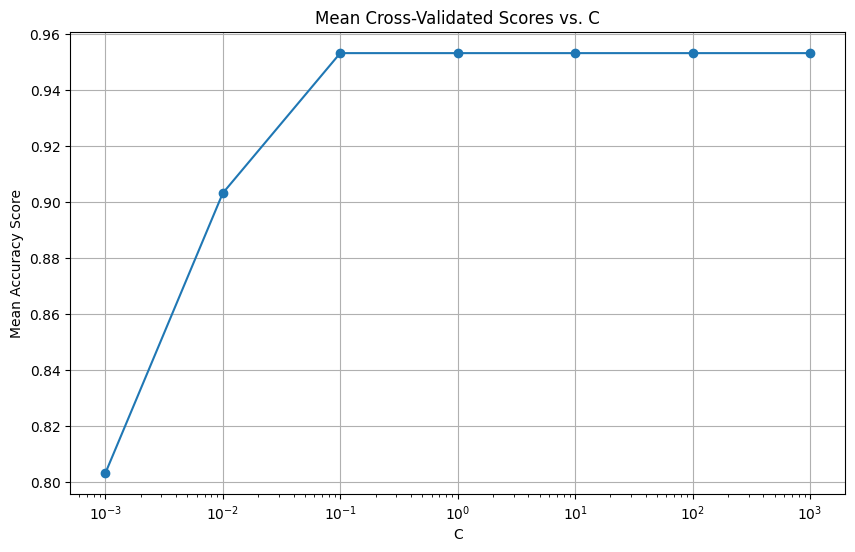

In [107]:

mean_scores = np.array(grid_search.cv_results_['mean_test_score'])
C_values = param_grid['C']
plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_scores, marker='o')
plt.xscale('log')  
plt.title('Mean Cross-Validated Scores vs. C')
plt.xlabel('C')
plt.ylabel('Mean Accuracy Score')
plt.grid()
plt.show()

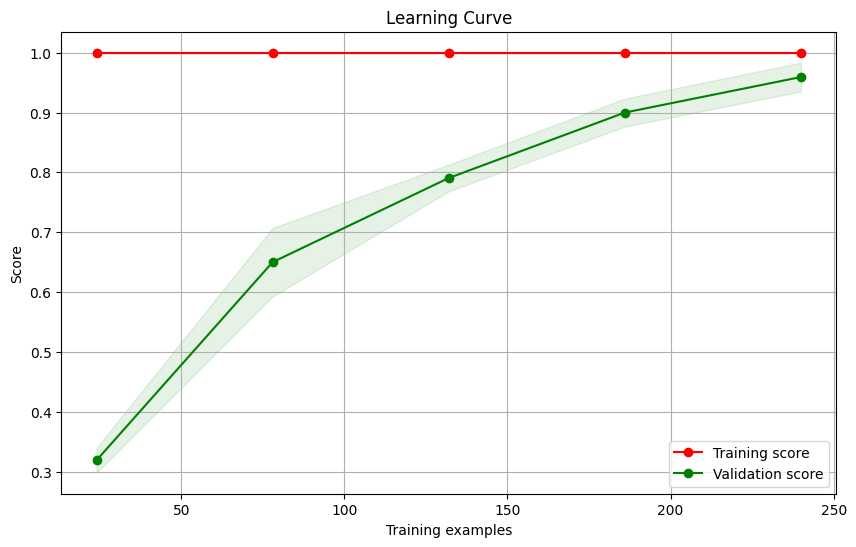

In [108]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")

    return plt

cv = 4  
plot_learning_curve(best_svm_classifier, X_train, y_train, cv=cv, n_jobs=4)
plt.show()



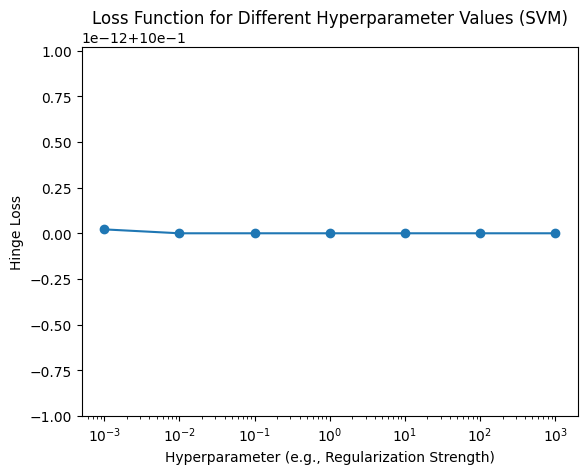

In [109]:
from sklearn.metrics import hinge_loss

loss_values = []

for hyperparameter in param_grid['C']:
    svm_model = SVC(C=hyperparameter, kernel='linear', probability=True)
    
    svm_model.fit(X_train, y_train)
    
    decision_values = svm_model.decision_function(X_train)
    
    binary_scores = 1 / (1 + np.exp(-decision_values))
    
    loss = hinge_loss(y_train, binary_scores)
    
    loss_values.append(loss)

plt.plot(param_grid['C'], loss_values, marker='o')
plt.xlabel('Hyperparameter (e.g., Regularization Strength)')
plt.ylabel('Hinge Loss')
plt.title('Loss Function for Different Hyperparameter Values (SVM)')
plt.xscale('log')  
plt.show()
